In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [3]:
torch.__version__

'2.9.1+cu128'

In [4]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [5]:
train_split = int(0.8*(len(X)))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train)

40

In [6]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10,7))

    plt.scatter(train_data, train_labels, s=4, c="b", label="Training data")
    plt.scatter(test_data, test_labels, s=4, c="g", label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size": 14})



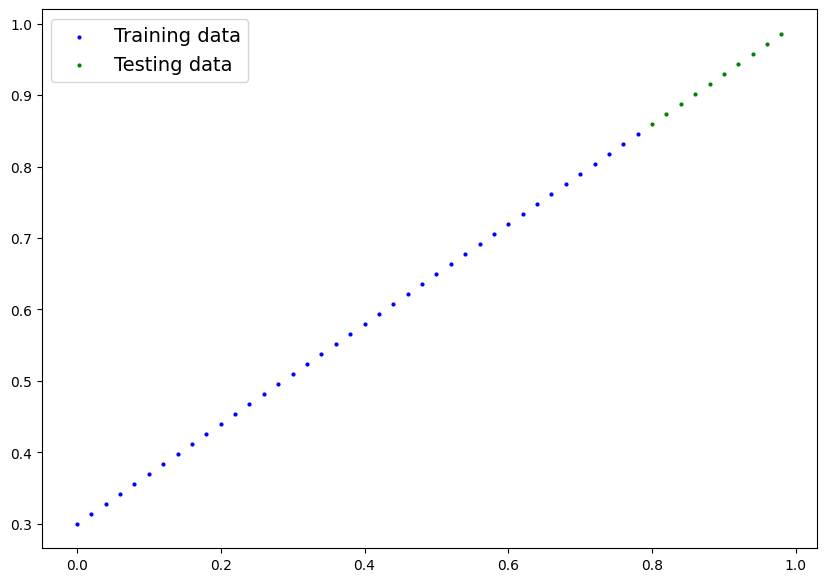

In [7]:
plot_predictions()

In [8]:
## Building a model

class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [9]:
torch.manual_seed(42)

model_0 = LinearRegression()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
# making prediction 
with torch.inference_mode():
    y_pred = model_0(X_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

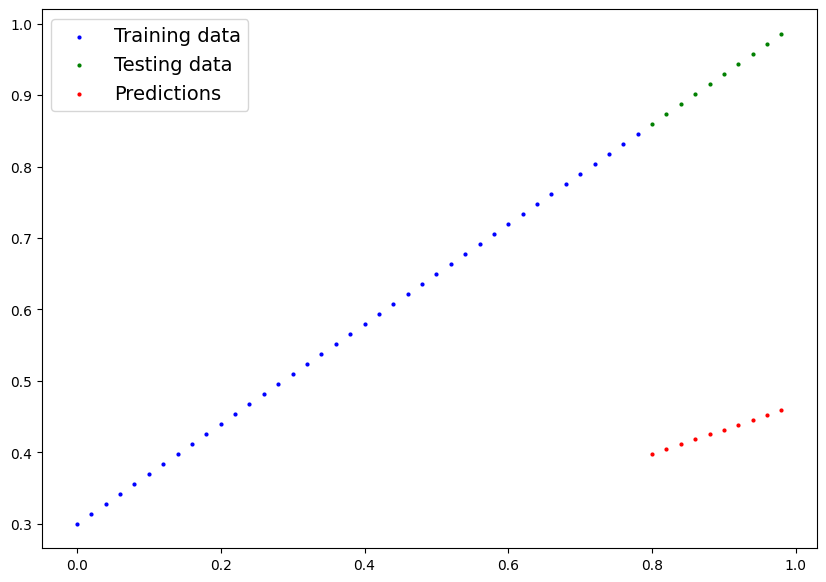

In [12]:
plot_predictions(predictions=y_pred)

In [13]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [14]:
# loss function
loss_fn = nn.L1Loss()

# setup optimiser (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [15]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [16]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [17]:
epochs = 100

#tracking different values
epoch_count = []
loss_value = []
test_loss_value = []


# training 
for epoch in range(epochs):
    model_0.train() # train mode sets all params that require gradients

    # forward pass
    y_pred = model_0(X_train)

    # calculate the loss
    loss = loss_fn(y_pred, y_train)
    print(f"Loss {loss}")

    # optimizer zero grad
    optimizer.zero_grad()

    # backpropogation
    loss.backward()

    # perform gradient descent
    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)
    
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_value.append(loss)
        test_loss_value.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
        print(model_0.state_dict())
    

Loss 0.31288138031959534
Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])})
Loss 0.3013603389263153
Loss 0.28983935713768005
Loss 0.2783183455467224
Loss 0.26679736375808716
Loss 0.2552763521671295
Loss 0.24375534057617188
Loss 0.23223432898521423
Loss 0.22071333229541779
Loss 0.20919232070446014
Loss 0.1976713240146637
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict({'weights': tensor([0.3796]), 'bias': tensor([0.2388])})
Loss 0.18615034222602844
Loss 0.1746293306350708
Loss 0.16310831904411316
Loss 0.1515873372554779
Loss 0.14006635546684265
Loss 0.1285453587770462
Loss 0.11702437698841095
Loss 0.1060912236571312
Loss 0.09681284427642822
Loss 0.08908725529909134
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict({'weights': tensor([0.4184]), 'bias': tensor([0.3333])})
Loss 0.08227583020925522
Loss 0.07638873159885406
Loss 0.071600072

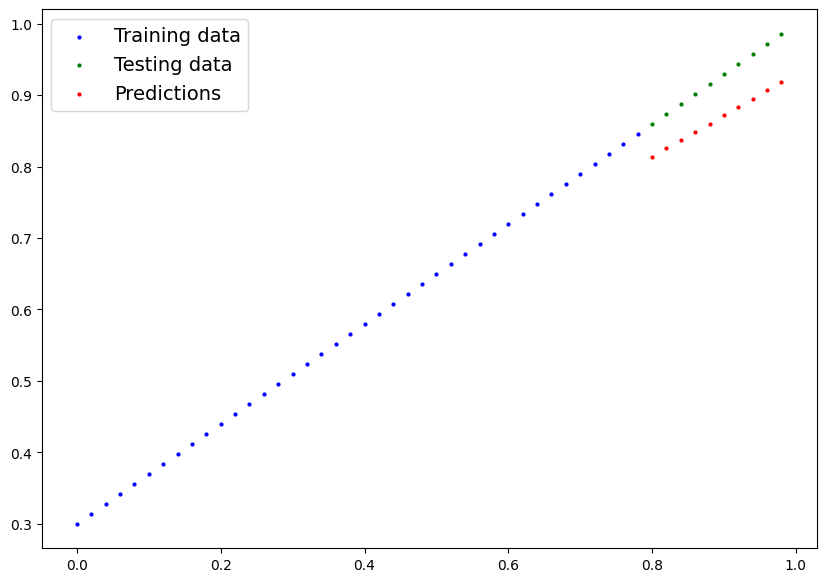

In [18]:
with torch.inference_mode():
    y_pred_new = model_0(X_test)

plot_predictions(predictions=y_pred_new)

/tmp/ipykernel_19681/3986638642.py:2: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  plt.plot(epoch_count, np.array(torch.tensor(loss_value).numpy()), label="Train loss")


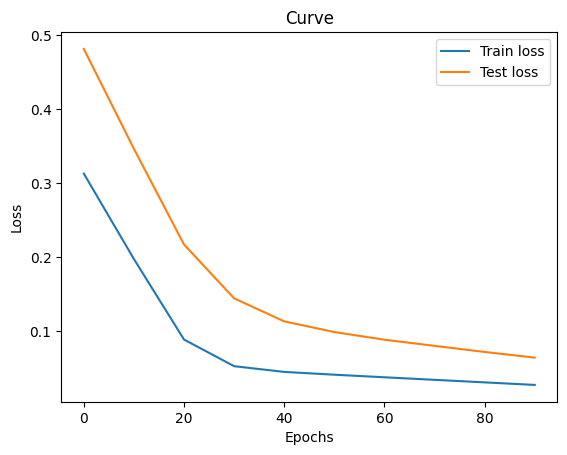

In [19]:
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_value).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_value, label="Test loss")
plt.title("Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [20]:
# saving a model 
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/model_0.pth


In [ ]:
import torch
import torch.nn as nn 
import numpy as np
import matplotlib.pyplot as plt

torch.__version__

'2.9.1+cu128'

In [22]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [26]:
weight = 0.5
bias = 0.3

start = 0
end = 1
step = 0.01

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3050],
         [0.3100],
         [0.3150],
         [0.3200],
         [0.3250],
         [0.3300],
         [0.3350],
         [0.3400],
         [0.3450]]),
 100,
 100)

In [27]:
train_split = int(0.7*len(X))
X_train , y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(70, 70, 30, 30)

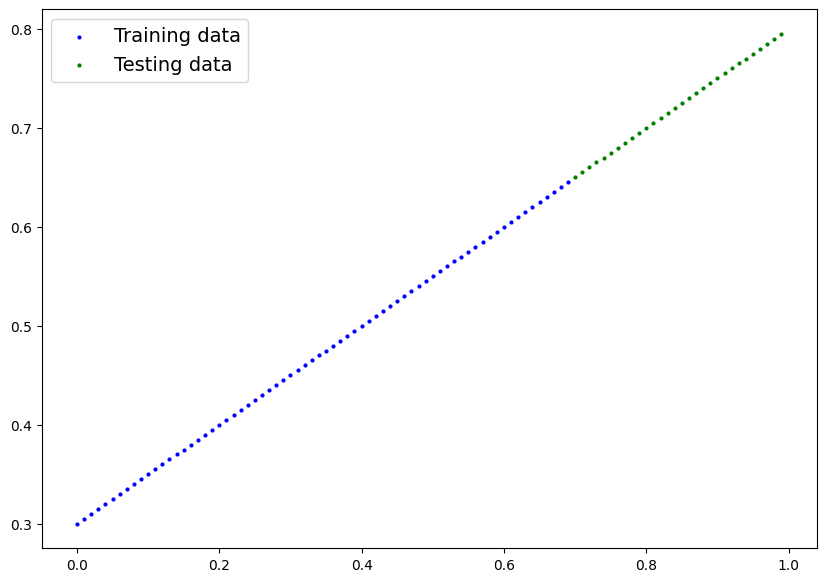

In [28]:
plot_predictions(X_train, y_train, X_test, y_test)

In [30]:
class LinearRegressionV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionV2()
model_1.state_dict(), model_1


(OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]),
 LinearRegressionV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ))

In [31]:
next(model_1.parameters()).device

device(type='cpu')

In [32]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [36]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [ ]:
torch.manual_seed(42)
epochs = 100

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    model_1.train()

    y_pred = model_1(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)

        test_loss = loss_fn(test_pred, y_test)

    if epoch%10==0:
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        epoch_count.append(epoch)
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.008774520829319954 | Test Loss: 0.0007263859733939171
Epoch: 10 | Loss: 0.008774520829319954 | Test Loss: 0.0007263859733939171
Epoch: 20 | Loss: 0.008774520829319954 | Test Loss: 0.0007263859733939171
Epoch: 30 | Loss: 0.008774520829319954 | Test Loss: 0.0007263859733939171
Epoch: 40 | Loss: 0.008774520829319954 | Test Loss: 0.0007263859733939171
Epoch: 50 | Loss: 0.008774520829319954 | Test Loss: 0.0007263859733939171
Epoch: 60 | Loss: 0.008774520829319954 | Test Loss: 0.0007263859733939171
Epoch: 70 | Loss: 0.008774520829319954 | Test Loss: 0.0007263859733939171
Epoch: 80 | Loss: 0.008774520829319954 | Test Loss: 0.0007263859733939171
Epoch: 90 | Loss: 0.008774520829319954 | Test Loss: 0.0007263859733939171


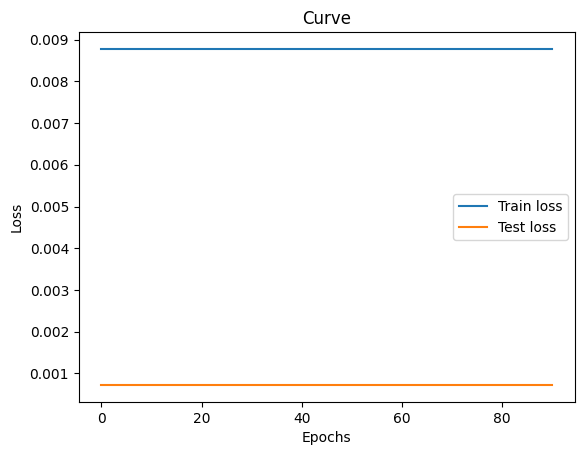

In [49]:
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label="Test loss")
plt.title("Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()